In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [103]:
clustering_data = pd.read_csv('clustering_data.data')
clustering_data 

,1,022212183,-0,067254273
0,1,102810613,0,104420027.0
1,1,80698923,0,97135035.0
2,0,960665523,0,299702497.0
3,1,7170586,0,32755328.0
4,0,935936414,0,21351002.0
...,...,...,...,...
394,0,66589719,0,173135712.0
395,0,8636196,0,1184885.0
396,0,130354847,0,86935863.0
397,0,60416629,0,6393298.0


In [24]:
# i)
# dataset lesen
clustering_data = pd.read_csv('clustering_data.data', delimiter=',', header=None, names=['ID1', 'X1','ID2', 'X2'])
clustering_data


,ID1,X1,ID2,X2
0,1,22212183,0,67254273.0
1,1,102810613,0,104420027.0
2,1,80698923,0,97135035.0
3,0,960665523,0,299702497.0
4,1,7170586,0,32755328.0
...,...,...,...,...
395,0,66589719,0,173135712.0
396,0,8636196,0,1184885.0
397,0,130354847,0,86935863.0
398,0,60416629,0,6393298.0


Text(0, 0.5, 'X2')

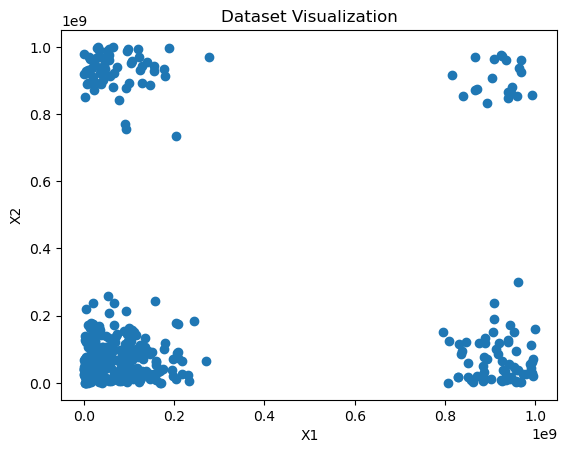

In [25]:
# visualisiere das Dataset mit matplotlib
plt.scatter(clustering_data['X1'], clustering_data['X2'])
plt.title('Dataset Visualization')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

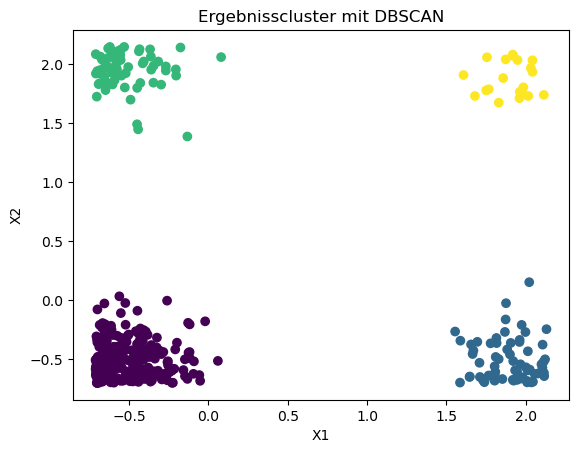

In [19]:
# Konstruiere mein Clusters mit DBSCAN Algorithmus

# erstelle eine neue Instanz von StandardScaler und standardisiere die Daten
scaler = StandardScaler()
clustering_data[['X1', 'X2']] = scaler.fit_transform(clustering_data[['X1', 'X2']])

# trainiere mein Model mit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clustering_data['Cluster'] = dbscan.fit_predict(clustering_data[['X1', 'X2']])

# Visualisiere de Ergebnisse
plt.scatter(clustering_data['X1'], clustering_data['X2'], c=clustering_data['Cluster'], cmap='viridis')
plt.title('Ergebnisscluster mit DBSCAN')
plt.xlabel('X1')
plt.ylabel('X2')


In [95]:
# ii)
# add neue Data Punkt
new_data_point = pd.DataFrame({'ID1': [1], 'X1': [600000000], 'ID2': [0], 'X2': [300000000]})
data_with_new_point = pd.concat([clustering_data, new_data_point], ignore_index=True)
data_with_new_point

,ID1,X1,ID2,X2
0,1,22212183,0,67254273.0
1,1,102810613,0,104420027.0
2,1,80698923,0,97135035.0
3,0,960665523,0,299702497.0
4,1,7170586,0,32755328.0
...,...,...,...,...
396,0,8636196,0,1184885.0
397,0,130354847,0,86935863.0
398,0,60416629,0,6393298.0
399,0,49427098,0,13612545.0


Text(0, 0.5, 'X2')

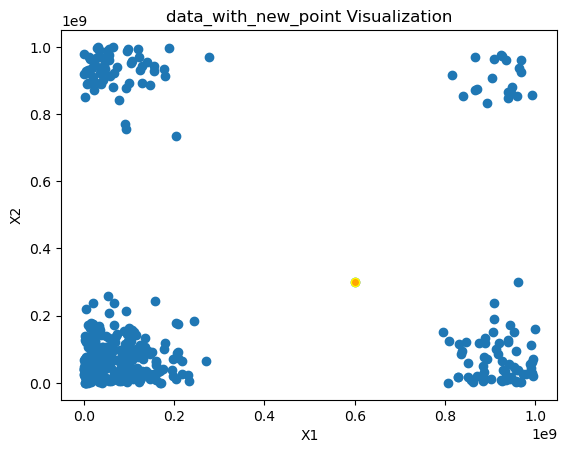

In [96]:
plt.scatter(data_with_new_point['X1'], data_with_new_point['X2'])
plt.scatter(new_data_point['X1'], new_data_point['X2'], c='orange', label='Extremer Ausreißer', edgecolor='yellow')
plt.title('data_with_new_point Visualization')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

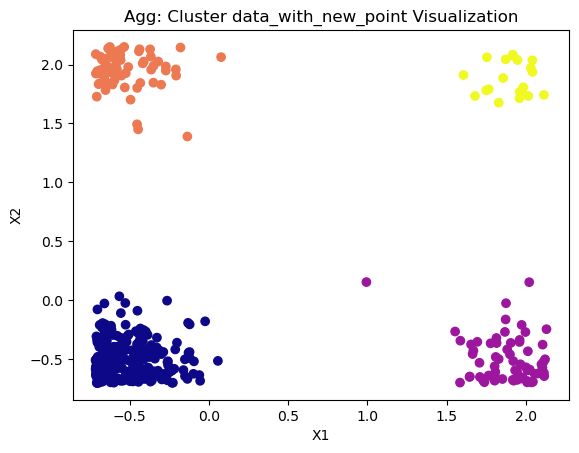

In [92]:
# a) mit derselben Anzahl von Clustern
agg_clustering = AgglomerativeClustering(n_clusters=4)
data_with_new_point['Cluster'] = agg_clustering.fit_predict(data_with_new_point[['X1', 'X2']])

# DV
plt.scatter(data_with_new_point['X1'], data_with_new_point['X2'], c=data_with_new_point['Cluster'], cmap='plasma')
plt.title('Agg: Cluster data_with_new_point Visualization')
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

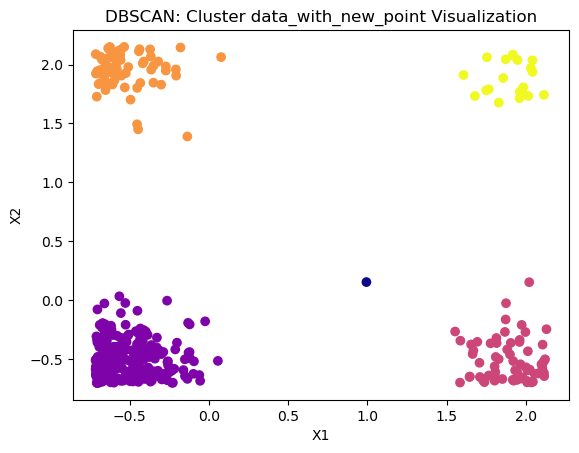

In [90]:
# b) mit einem zusätzlichen Cluster
scaler = StandardScaler()
data_with_new_point[['X1', 'X2']] = scaler.fit_transform(data_with_new_point[['X1', 'X2']])

dbscan1 = DBSCAN(eps=0.4, min_samples=4)
data_with_new_point['Cluster'] = dbscan1.fit_predict(data_with_new_point[['X1', 'X2']])

# DV
plt.scatter(data_with_new_point['X1'], data_with_new_point['X2'], c=data_with_new_point['Cluster'], cmap='plasma')
plt.title('DBSCAN: Cluster data_with_new_point Visualization')
plt.xlabel('X1')
plt.ylabel('X2')

In [98]:
# iii)
clustering_data_ext = pd.read_csv('clustering_data_ext.data')
clustering_data_ext

,1,022212183,-0,067254273,-1,132344635,-0.1,855445727,-0.2,439937376,...,0.65,536208289,0.66,220699106,0.67,193068901,0.68,891531932,-0.68,731551509
0,1,102810613,0,104420027.0,0,808958035,0,303095284,0,504970884,...,-2,4533925,0,829390257,0,863401122,-1,372886255,1,193148861
1,1,80698923,0,97135035.0,0,64998449,1,773445589,0,269507503,...,1,301108757,-1,6690403,1,117342941,0,499125314,1,11470365
2,0,960665523,0,299702497.0,-1,121005735,0,238246,1,38146664,...,0,37593575,0,325021541,0,909478725,0,27847042,1,516756905
3,1,7170586,0,32755328.0,-1,325456497,0,107315242,-3,52768427,...,0,403369477,0,739297829,0,967199534,0,400388646,0,963464219
4,0,935936414,0,21351002.0,0,343719139,0,164863973,0,15511595,...,1,48259572,0,286847028,1,139650383,1,769124461,0,404290732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0,66589719,0,173135712.0,0,903286337,-1,14641401,0,332272302,...,1,301873116,0,5823808,0,778267977,-1,34791313,0,403839
395,0,8636196,0,1184885.0,0,86211643,0,602952266,0,698408905,...,-1,880664513,1,559674639,0,215486095,0,104830236,0,63603073
396,0,130354847,0,86935863.0,0,920897067,-1,164403815,0,362561453,...,-2,504568639,0,408301078,0,231968912,0,369400258,1,109186883
397,0,60416629,0,6393298.0,0,962377795,1,356235965,0,137696479,...,0,65459977,1,512651131,0,559163933,0,3290769,0,201028582


In [114]:
clustering_data_ext = pd.read_csv('clustering_data_ext.data', delimiter=',', decimal=',', header=None)
clustering_data_ext

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,1,22212183,0,67254273.0,-1,132344635,0,855445727,0,439937376,...,0,536208289,0,220699106,0,193068901,0,891531932,0,731551509
1,1,102810613,0,104420027.0,0,808958035,0,303095284,0,504970884,...,-2,4533925,0,829390257,0,863401122,-1,372886255,1,193148861
2,1,80698923,0,97135035.0,0,64998449,1,773445589,0,269507503,...,1,301108757,-1,6690403,1,117342941,0,499125314,1,11470365
3,0,960665523,0,299702497.0,-1,121005735,0,238246,1,38146664,...,0,37593575,0,325021541,0,909478725,0,27847042,1,516756905
4,1,7170586,0,32755328.0,-1,325456497,0,107315242,-3,52768427,...,0,403369477,0,739297829,0,967199534,0,400388646,0,963464219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,66589719,0,173135712.0,0,903286337,-1,14641401,0,332272302,...,1,301873116,0,5823808,0,778267977,-1,34791313,0,403839
396,0,8636196,0,1184885.0,0,86211643,0,602952266,0,698408905,...,-1,880664513,1,559674639,0,215486095,0,104830236,0,63603073
397,0,130354847,0,86935863.0,0,920897067,-1,164403815,0,362561453,...,-2,504568639,0,408301078,0,231968912,0,369400258,1,109186883
398,0,60416629,0,6393298.0,0,962377795,1,356235965,0,137696479,...,0,65459977,1,512651131,0,559163933,0,3290769,0,201028582


          PC1       PC2
0   -3.520755 -1.288075
1    1.107717  1.591657
2    1.133682  2.323116
3   -2.247697 -1.650387
4   -0.902939 -0.500223
..        ...       ...
395 -1.493395 -3.771414
396  0.955932 -0.788645
397 -0.093958  0.134339
398 -0.121933  1.351117
399  0.474684  0.133672

[400 rows x 2 columns]


Text(0, 0.5, 'Principal Component 2')

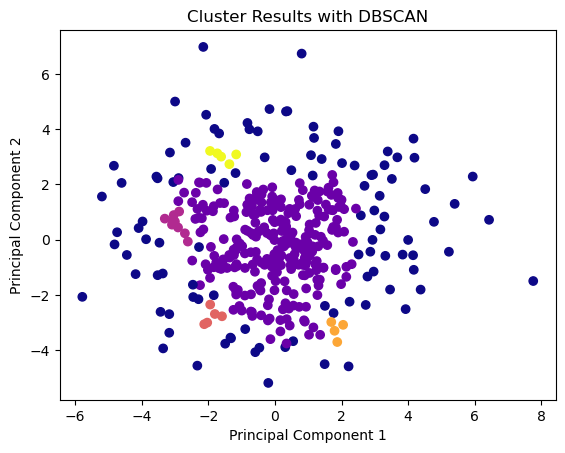

In [117]:
# erstelle eine neue Instanz von StandardScaler und standardisiere die Daten
scaler = StandardScaler()
data_scaled = scaler.fit_transform(clustering_data_ext)

#Dimesionalität in 2D reduzieren : mit der Principal Component Analysis-PCA- Technik
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# erstelle eine neue DataFrame für die reduzierten Daten
df_2d = pd.DataFrame(data_2d, columns=['PC1', 'PC2'])
print(df_2d)
df_2d['Cluster'] = dbscan.fit_predict(df_2d)
plt.scatter(df_2d['PC1'], df_2d['PC2'], c=df_2d['Cluster'], cmap='plasma')
plt.title('Cluster Results with DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')